
## OpenSees Examples Manual
# EXAMPLE 1b.Portal2D.Push 
##                 using OpenSeesPy
####   by Silvia Mazzoni, 2021, silviamazzoni@yahoo.com
## copyright: 
##   NO PART OF THIS CODE MAY BE REPRODUCED OR DISTRIBUTED WITHOUT PRIOR WRITTEN CONSENT FROM THE AUTHOR


pyEx1b.Portal2D.Push.tcl.py
 "Done!
No Model_ODB specified, trying to get data from the active model.
2D model


<IPython.core.display.Javascript object>


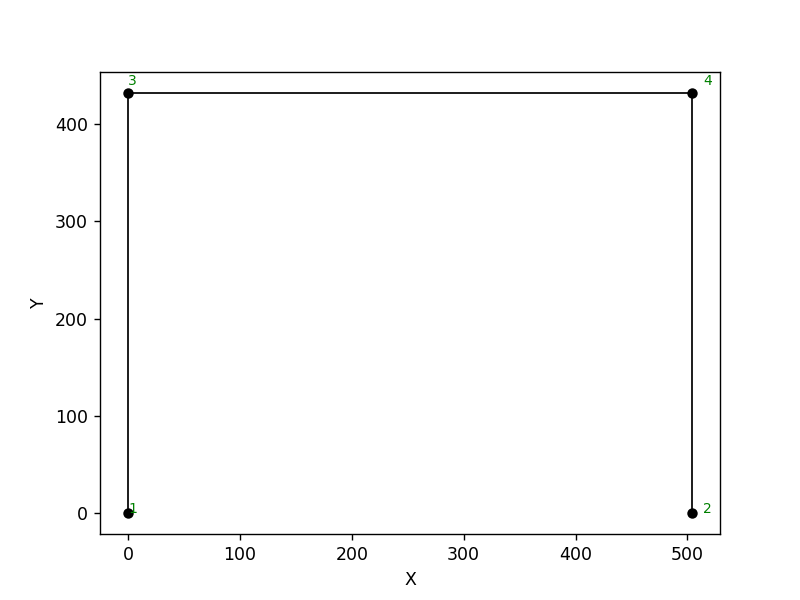

End of Run: pyEx1b.Portal2D.Push.tcl.py


In [1]:

############################################################
#  EXAMPLE: 
#       pyEx1b.Portal2D.Push.tcl.py
#          for OpenSeesPy
#  --------------------------------------------------------#
#  by: Silvia Mazzoni, 2020
#       silviamazzoni@yahoo.com
############################################################
# This file was obtained from a conversion of the updated Tcl script
# The Tcl script was obtained by updating the Examples Manual published in the OpenSees Wiki Page
tclFilename = 'Ex1b.Portal2D.Push.tcl'
pyFilename = 'pyEx1b.Portal2D.Push.tcl.py'
print(pyFilename)
############################################################

# start inserting this into every OpenSeesPy script
import openseespy.opensees as ops
import os
import math
import openseespy.postprocessing.Get_Rendering as opsplt
import numpy as numpy
import matplotlib.pyplot as plt
ops.wipe()
# end of inserting this into every OpenSeesPy script
# --------------------------------------------------------------------------------------------------
# Example 1. portal frame in 2D
# static pushover analysis of Portal Frame, with gravity.
# all units are in kip, inch, second
# elasticBeamColumn ELEMENT
# Silvia Mazzoni and Frank McKenna, 2006
#
# ^Y
# or
# 3_________(3)________4 __
# or     |  |
# or     |  |
# or     |  |
# (1)     (2) LCol
# or     |  |
# or     |  |
# or     |  |
# =1=    =2= _or_ -------->X
# or----------LBeam------------|
#

# SET UP ----------------------------------------------------------------------------
ops.wipe()     #  clear opensees model
ops.model('basic','-ndm',2,'-ndf',3)     #  2 dimensions, 3 dof per node
if not os.path.exists('Data'):
	os.mkdir('Data')

#exec(open('pyLibDisplayPlane.tcl.py').read())
#exec(open('pyLibDisplayModel2D.tcl.py').read())
#exec(open('pyLibDisplayModel3D.tcl.py').read())

# define GEOMETRY -------------------------------------------------------------
# nodal coordinates:
ops.node(1,0,0)     #  node , X Y
ops.node(2,504,0)
ops.node(3,0,432)
ops.node(4,504,432)

# Single point constraints -- Boundary Conditions
ops.fix(1,1,1,1)     #  node DX DY RZ
ops.fix(2,1,1,1)     #  node DX DY RZ
ops.fix(3,0,0,0)
ops.fix(4,0,0,0)

# nodal masses:
ops.mass(3,5.18,0.,0.)     #  node , Mx My Mz, Mass=Weight/g.
ops.mass(4,5.18,0.,0.)

# Define ELEMENTS -------------------------------------------------------------
# define geometric transformation: performs a linear geometric transformation of beam stiffness and resisting force from the basic system to the global-coordinate system
ops.geomTransf('Linear',1)     #  associate a tag to transformation

# connectivity: (make A very large, 10e6 times its actual value)
ops.element('elasticBeamColumn',1,1,3,3600000000,4227,1080000,1)     #  element elasticBeamColumn eleTag iNode jNode A E Iz transfTag
ops.element('elasticBeamColumn',2,2,4,3600000000,4227,1080000,1)
ops.element('elasticBeamColumn',3,3,4,5760000000,4227,4423680,1)

# Define RECORDERS -------------------------------------------------------------
ops.recorder('Node','-file','Data/DFree.out','-time','-node',3,4,'-dof',1,2,3,'disp')     #  displacements of free nodes
ops.recorder('Node','-file','Data/DBase.out','-time','-node',1,2,'-dof',1,2,3,'disp')     #  displacements of support nodes
ops.recorder('Node','-file','Data/RBase.out','-time','-node',1,2,'-dof',1,2,3,'reaction')     #  support reaction
##notInOpenSeesPy## ops.recorder('Drift','-file','Data/Drift.out','-time','-iNode',1,2,'-jNode',3,4,'-dof',1,'-perpDirn',2)     #  lateral drift
ops.recorder('Element','-file','Data/FCol.out','-time','-ele',1,2,'globalForce')     #  element forces -- column
ops.recorder('Element','-file','Data/FBeam.out','-time','-ele',3,'globalForce')     #  element forces -- beam

##unknown##DisplayModel2D DeformedShape 10; # amplify deformations 10x

# define GRAVITY -------------------------------------------------------------
ops.timeSeries('Linear',1)     # timeSeries Linear 1;
# define Load Pattern
ops.pattern('Plain',1,1) # 
ops.eleLoad('-ele',3,'-type','-beamUniform',-7.94)     #  distributed superstructure-weight on beam
# endCurlyBrace 




ops.wipeAnalysis()     # adding this to clear Analysis module 
ops.constraints('Plain')     #  how it handles boundary conditions
ops.numberer('Plain')     #  renumber dofs to minimize band-width (optimization), if you want to
ops.system('BandGeneral')     #  how to store and solve the system of equations in the analysis
ops.test('NormDispIncr',1.0e-8,6)     #  determine if convergence has been achieved at the end of an iteration step
ops.algorithm('Newton')     #  use Newtons solution algorithm: updates tangent stiffness at every iteration
ops.integrator('LoadControl',0.1)     #  determine the next time step for an analysis,   apply gravity in 10 steps
ops.analysis('Static')     #  define type of analysis static or transient
ops.analyze(10)     #  perform gravity analysis
ops.loadConst('-time',0.0)     #  hold gravity constant and restart time

# define LATERAL load -------------------------------------------------------------
# Lateral load pattern
ops.timeSeries('Linear',2)     # timeSeries Linear 2;
# define Load Pattern
ops.pattern('Plain',2,2) # 
ops.load(3,2000.,0.0,0.0)     #  node , FX FY MZ -- representative lateral load at top nodes
ops.load(4,2000.,0.0,0.0)     #  place 1/2 of the weight for each node to get shear coefficient
# endCurlyBrace 

# pushover: diplacement controlled static analysis
ops.integrator('DisplacementControl',3,1,0.1)     #  switch to displacement control, for node 11, dof 1, 0.1 increment
ops.analyze(100)     #  apply 100 steps of pushover analysis to a displacement of 10

print(' "Done!')




# inserting this at the end of every script
# ops.printModel()
# turn these on if you want, but not sure they will work
opsplt.plot_model("nodes")
#opsplt.plot_modeshape(1)
#opsplt.plot_modeshape(2)
# done inserting this at the end of every script
ops.wipe()
plt.close('all')
fname3 = 'Data/DFree.out'
dataDFree = numpy.loadtxt(fname3)
plt.subplot(211)
plt.title('Ex1b.Portal2D.Push.tcl')
plt.grid(True)
plt.plot(dataDFree[:,1])
plt.xlabel('Step Number')
plt.ylabel('Free-Node Displacement')
plt.subplot(212)
plt.grid(True)
plt.plot(dataDFree[:,1],dataDFree[:,0])
plt.xlabel('Free-Node Disp.')
plt.ylabel('Pseudo-Time (~Force)')
print('End of Run: pyEx1b.Portal2D.Push.tcl.py')
